In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df_results = pd.read_csv("multi_carnival_results.csv", index_col=0)
df_results

,dataset,num_samples,mode,old_multicond,beta,max_time,norel_time,seed,acyclic_signal_version,total_time,...,prop_diff_edges,sparsity,multi_single,b_value,mt_value,norel_value,norm_edges,norm_error,max_norm_edges,dist
22,../GSE186341-PANACEA.tsv.xz,7,multi,NaN,0.20,7200,1800,0,True,4961.545024,...,0.394366,0.329583,multi,0.20,7200,1800,0.012680,0.008929,0.421365,0.015508
25,../GSE186341-PANACEA.tsv.xz,7,multi,NaN,0.25,7200,1800,0,True,5129.181168,...,0.368056,0.329404,multi,0.25,7200,1800,0.012858,0.008929,0.427300,0.015654
24,../GSE186341-PANACEA.tsv.xz,7,multi,NaN,0.05,7200,1800,0,True,6284.666244,...,0.289655,0.329315,multi,0.05,7200,1800,0.012948,0.008929,0.430267,0.015728
6,../GSE186341-PANACEA.tsv.xz,7,multi,NaN,0.10,7200,1800,0,True,7216.639204,...,0.389262,0.328958,multi,0.10,7200,1800,0.013305,0.008929,0.442136,0.016023
38,../GSE186341-PANACEA.tsv.xz,7,single,NaN,0.10,7200,0,0,True,226.098537,...,0.723810,0.981248,single,0.10,7200,0,0.018752,0.008929,0.623145,0.020769
28,../GSE186341-PANACEA.tsv.xz,7,single,NaN,0.20,7200,0,0,True,220.090180,...,0.754717,0.981070,single,0.20,7200,0,0.018930,0.008929,0.629080,0.020930
27,../GSE186341-PANACEA.tsv.xz,7,single,NaN,0.05,7200,0,0,True,223.938527,...,0.742991,0.980891,single,0.05,7200,0,0.019109,0.008929,0.635015,0.021092
46,../GSE186341-PANACEA.tsv.xz,7,single,NaN,0.15,7200,0,0,True,219.668302,...,0.758140,0.980802,single,0.15,7200,0,0.019198,0.008929,0.637982,0.021173
11,../GSE186341-PANACEA.tsv.xz,7,multi,NaN,0.35,7200,1800,0,True,7218.931433,...,0.382979,0.329672,multi,0.35,7200,1800,0.012590,0.017256,0.418398,0.021360
18,../GSE186341-PANACEA.tsv.xz,7,multi,NaN,0.30,7200,1800,0,True,7215.645503,...,0.366906,0.329851,multi,0.30,7200,1800,0.012412,0.017857,0.412463,0.021747


In [3]:
def plot_dataset(dataset=None, data=df_results, x_label="norm_error", y_label="norm_edges", **kwargs): 
    df_data = data
    if dataset is not None:
        df_data = data[data.dataset==dataset]
    ax = sns.scatterplot(data=df_data, x=x_label, y=y_label, hue="multi_single", **kwargs)
    ax.set_xlim(0, None)
    ax.set_ylim(0, None)
    sns.despine()

    # Multi
    df_multi = df_data[df_data.multi_single == "multi"]
    pareto_x, pareto_y = compute_pareto_front(df_multi, x_label, y_label)
    ax.plot(pareto_x, pareto_y, linestyle="--")
    
    # Single
    df_single = df_data[df_data.multi_single == "single"]
    pareto_x, pareto_y = compute_pareto_front(df_single, x_label, y_label)
    ax.plot(pareto_x, pareto_y, linestyle="--")
    ax.set_xlabel("Avg. fitting error")
    ax.set_ylabel("Proportion of edges from PKN")

    if "legend" in kwargs and kwargs["legend"]:
        ax.legend(title="CARNIVAL method")
        
    return ax

def compute_pareto_front(df, x_col, y_col):
    # Extract the x and y values from the DataFrame
    x = df[x_col].values
    y = df[y_col].values

    # Sort the values by x
    sorted_indices = np.argsort(x)
    sorted_x = x[sorted_indices]
    sorted_y = y[sorted_indices]

    # Initialize the Pareto front
    pareto_x = [sorted_x[0]]
    pareto_y = [sorted_y[0]]

    # Loop to find the Pareto front
    for i in range(1, len(sorted_x)):
        if sorted_y[i] <= pareto_y[-1]:  # assuming lower y is better
            pareto_x.append(sorted_x[i])
            pareto_y.append(sorted_y[i])

    return pareto_x, pareto_y

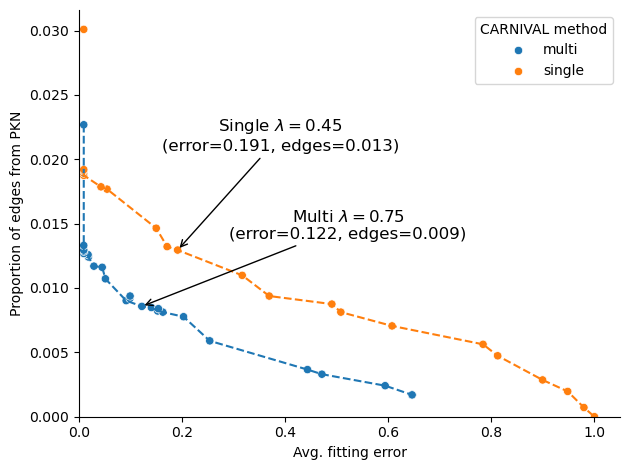

In [4]:
df_results["max_norm_edges"] = df_results["norm_edges"]/df_results["norm_edges"].max()

# Dist from (0,0) (best possible score)
df_results["dist"] = np.sqrt(df_results["norm_error"]**2 + df_results["max_norm_edges"]**2)
df_results = df_results.sort_values(by="dist", ascending=True)


lambd, x, y = df_results[df_results["mode"]=="multi"][["beta", "norm_error","norm_edges"]].head(1).values[0]
lambd0, x0, y0 = df_results[df_results["mode"]=="single"][["beta", "norm_error","norm_edges"]].head(1).values[0]

plot_dataset(
    data=df_results,
    legend=True
)

#plt.text(x, y, f'$\lambda=${lambd:.2f}', fontsize=12, ha='left', va='bottom')

plt.annotate(f'Multi $\lambda=${lambd:.2f}\n(error={x:.3f}, edges={y:.3f})', 
             xy=(x, y),
             xytext=(x + 0.4, y + 0.005),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12,
             ha='center',
             va='bottom')

plt.annotate(f'Single $\lambda=${lambd0:.2f}\n(error={x0:.3f}, edges={y0:.3f})', 
             xy=(x0, y0),
             xytext=(x0 + 0.2, y0 + 0.0075),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=12,
             ha='center',
             va='bottom')

plt.tight_layout()
plt.savefig("carnival_single_vs_multi_panacea.pdf", format="pdf")